<a href="https://colab.research.google.com/github/Arham-Reza/Kaggle_Titanic/blob/main/Titanic_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Application on Titanic
**Import of required modules and libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
!pip install translate
from translate import Translator
print("Required libraries and modules imported successfully!")

import warnings
warnings.filterwarnings("ignore")
print("Warnings will be ignored")

Required libraries and modules imported successfully!
Warnings will be ignored


In [ ]:
df = pd.read_csv("/content/titanic_preprocessed.csv")
df_predict = pd.read_csv("/content/titanic_preprocessed2.csv")
df2 = df_predict
print("Dataset imported!")

Dataset imported!


# Dimension of Datasets

In [ ]:
print("Number of rows in the training set is : ", df.shape[0])
print("Number of columns in the training set is : ", df.shape[1])

Number of rows in the training set is :  891
Number of columns in the training set is :  13


In [ ]:
print("Number of rows in the training set is : ", df2.shape[0])
print("Number of columns in the training set is : ", df2.shape[1])


Number of rows in the training set is :  418
Number of columns in the training set is :  12


# Sample outlook on the datasets

In [ ]:
df.sample(5)

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
698,699,Mr,John Borland,Thayer,0,1,male,49.0,1,1,17421,12.32,C
361,362,Mr,Sebastiano,del Carlo,0,2,male,29.0,1,0,SC/PARIS 2167,6.93,C
160,161,Mr,John Hatfield,Cribb,0,3,male,44.0,0,1,371362,4.03,S
822,823,Jonkheer,John George,Reuchlin,0,1,male,38.0,0,0,19972,512.33,S
63,64,Master,Harald,Skoog,0,3,male,4.0,3,2,347088,0.78,S


In [ ]:
df2.sample(5)

,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
132,1024,Mrs,Frank (Frances),Lefebre,3,female,37.701613,0,4,4133,25.4667,S
166,1058,Mr,Emil,Brandeis,1,male,48.000000,0,0,PC 17591,50.4958,C
261,1153,Mr,August Ferdinand,Nilsson,3,male,21.000000,0,0,350410,7.8542,S
137,1029,Mr,August,Schmidt,2,male,26.000000,0,0,248659,13.0000,S
194,1086,Master,Marshall Brines,Drew,2,male,8.000000,0,2,28220,32.5000,S


# Data Pre-processing and Feature Engineering
Removing Columns

The columns **PassengerId, FirstName, LastName and Ticket** will be removed as these columns have too much unique values.

In [ ]:
df = df.drop(
        ["PassengerId", "FirstName", "LastName", "Ticket"],
        axis = 1
    )
print("Columns removed!")

Columns removed!


In [ ]:
df2 = df2.drop(
        ["PassengerId", "FirstName", "LastName", "Ticket"],
        axis = 1
    )
print("Columns removed!")

Columns removed!


# Feature Engineering on "Title"

In [ ]:
pd.DataFrame(
    index = [title for title in df["Title"].unique()],
    data = [(df["Title"][df["Title"] == title].count()) for title in df["Title"].unique()],
    columns = ["Count"]
)

,Count
Mr,517
Mrs,125
Miss,182
Master,40
Don,1
Rev,6
Dr,7
Mme,1
Ms,1
Major,2


It is clear from the above output, that the count of the titles other than Mr, Mrs, Miss, Master are less than 10.

Moreover, the titles "Mme" and "Mlle", respectively, stands for "Mrs" and "Mademoiselle" or "Miss".

In [ ]:
translator = Translator(to_lang = "French")
translator.translate("Mme")

'Mrs'

In [ ]:
translator = Translator(to_lang = "French")
translator.translate("Mlle")

'Mademoiselle'

So, "Mme" and "Mlle", respectively, will be replaced by, "Mrs" and "Miss".

"Ms" will also be replaced by "Miss".

The titles, "Don", "Rev", "Dr", "Major", "Lady", "Sir", "Col", "Capt", "the" and "Jonkheer" will be replaced by "Other_title".

In [ ]:
replace_list = ["Don", "Rev", "Dr", "Mme", "Ms", "Major", "Lady", "Sir", "Mlle", "Col", "Capt", "the", "Jonkheer"]

for title in replace_list :
    if title == "Mme" :
        df["Title"].replace(
            {
                title : "Mrs"
            },
            inplace = True
        )
    elif (title == "Mlle") | (title == "Ms") :
        df["Title"].replace(
            {
                title : "Mrs"
            },
            inplace = True
        )
    else :
        df["Title"].replace(
            {
                title : "Other_title"
            },
            inplace = True
        )
print("Titles are changed")

Titles are changed


In [ ]:
pd.DataFrame(
    index = [title for title in df["Title"].unique()],
    data = [(df["Title"][df["Title"] == title].count()) for title in df["Title"].unique()],
    columns = ["Count"]
)

,Count
Mr,517
Mrs,129
Miss,182
Master,40
Other_title,23


In [ ]:
df["Title"].replace(
    {
        "Mr" : 0,
        "Mrs" : 1,
        "Miss" : 2,
        "Master" : 3,
        "Other_title" : 4
    },
    inplace = True
)

print("Titles Renamed!")

Titles Renamed!


In [ ]:
replace_list = ["Don", "Rev", "Dr", "Mme", "Ms", "Major", "Lady", "Sir", "Mlle", "Col", "Capt", "the", "Jonkheer"]

for title in replace_list :
    if title == "Mme" :
        df2["Title"].replace(
            {
                title : "Mrs"
            },
            inplace = True
        )
    elif (title == "Mlle") | (title == "Ms") :
        df2["Title"].replace(
            {
                title : "Mrs"
            },
            inplace = True
        )
    else :
        df2["Title"].replace(
            {
                title : "Other_title"
            },
            inplace = True
        )
print("Titles are changed")

Titles are changed


In [ ]:
df2["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other_title', 'Dona'], dtype=object)

In [ ]:
df2["Title"].replace(
    {
        "Mr" : 0,
        "Mrs" : 1,
        "Miss" : 2,
        "Master" : 3,
        "Dona" : 4,
        "Other_title" : 4
    },
    inplace = True
)

print("Titles Renamed!")

Titles Renamed!


# Categorizing "Age"
The Age is a continuous type of data. So we will categorize the column.

But before that, we need to look at the minimum and maximum values attained in the Age column.

In [ ]:
print("Minimum Age : ", min(df["Age"]))
print("Maximum Age : ", max(df["Age"]))

Minimum Age :  0.42
Maximum Age :  80.0


**Range of Age	Categories	Denotions**

0 - 5	Infant	0

5 - 12	Child	1

12 - 19	Teenager	2

19 - 35	Young Adult	3

35 - 55	Middle Aged	4

55 - 65	Adult	5

more than 65	Senior	6

 So, we will categorize the Age column in a new column named "Age Group" and then remove the "Age" column.

In [ ]:
df["Age Group"] = pd.cut(
                    df["Age"],
                    bins = [0, 5, 12, 19, 35, 55, 65, 87],
                    right = True,
                    labels = [0, 1, 2, 3, 4, 5, 6]
                  )

df = df.drop(["Age"], axis = 1)

In [ ]:
df2["Age Group"] = pd.cut(
                    df2["Age"],
                    bins = [0, 5, 12, 19, 35, 55, 65, 87],
                    right = True,
                    labels = [0, 1, 2, 3, 4, 5, 6]
                  )

df2 = df2.drop(["Age"], axis = 1)

# Categorizing "Fare"
The Fare is a continuous type of data. So we will categorize the column.

But before that, we need to look at the minimum and maximum values attained in the Fare column.

In [ ]:
print("Minimum Fare : ", min(df["Fare"]))
print("Maximum Fare : ", max(df["Fare"]))

Minimum Fare :  0.16
Maximum Fare :  512.33


As the range of the fares is high, so this column will be categorized using deciles. Then the "Fare" column will be removed.

In [ ]:
df["Fare Group"] = pd.qcut(
                    df["Fare"],
                    q = 10,
                    labels = False
                  )

df = df.drop(["Fare"], axis = 1)

In [ ]:
df2["Fare Group"] = pd.qcut(
                    df2["Fare"],
                    q = 10,
                    labels = False
                  )

df2 = df2.drop(["Fare"], axis = 1)

# Rename Categories in "Sex" and "Embarked"
**Sex**

In [ ]:
df["Sex"].replace(
    {
        "male" : 0,
        "female" : 1
    },
    inplace = True
)

In [ ]:
df2["Sex"].replace(
    {
        "male" : 0,
        "female" : 1
    },
    inplace = True
)

**Embarked**

In [ ]:
df["Embarked"].replace(
    {
        "C" : 0,
        "Q" : 1,
        "S" : 2
    },
    inplace = True
)

In [ ]:
df2["Embarked"].replace(
    {
        "C" : 0,
        "Q" : 1,
        "S" : 2
    },
    inplace = True
)

# Sample outlook on the dataset after Pre-processing

In [ ]:
df.sample(15)

,Title,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age Group,Fare Group
104,0,0,3,0,2,0,2,4,0
837,0,0,3,0,0,0,2,3,5
484,0,1,1,0,1,0,0,3,8
186,1,1,3,1,1,0,1,4,2
768,0,0,3,0,1,0,1,3,2
754,1,1,2,1,1,2,2,4,2
169,0,0,3,0,0,0,2,3,9
60,0,0,3,0,0,0,0,3,3
341,2,1,1,1,3,2,2,3,3
1,1,1,1,1,1,0,0,4,8


In [ ]:
df2.sample(15)

,Title,Pclass,Sex,SibSp,Parch,Embarked,Age Group,Fare Group
137,0,2,0,0,0,2,3,4
32,1,3,1,1,2,2,3,5
157,2,3,1,0,0,2,3,2
168,1,1,1,0,0,0,4,7
105,0,3,0,0,0,2,3,6
156,2,1,1,0,0,2,3,9
255,0,3,0,0,0,2,3,0
159,1,3,1,0,2,2,3,4
163,0,3,0,0,0,2,3,0
248,1,2,1,1,0,2,3,6


# Splitting of Dependent-Independent Columns

In [ ]:
X = df.loc[ : , df.columns != 'Survived']
y = df['Survived']

# Train - Test Splitting
We will have 80% training data and 20% testing data.

In [ ]:
X_train, X_test, y_train , y_test = train_test_split( 
                                        X, 
                                        y, 
                                        test_size = 0.2, 
                                        random_state = 7
                                    )

# Modelling
**CART**

Training

Creating the classifier

In [ ]:
cart = DecisionTreeClassifier( criterion = "gini" )

Fitting the classifier

In [ ]:
cart.fit(X_train,y_train)

DecisionTreeClassifier()

**Testing**
Making Predictions

In [ ]:
y_train_pred_cart = cart.predict(X_train)
y_test_pred_cart = cart.predict(X_test)
print("Prediction done!")

Prediction done!


Checking Accuracy

In [ ]:
train_accuracy_cart = accuracy_score(y_train, y_train_pred_cart)
test_accuracy_cart = accuracy_score(y_test, y_test_pred_cart)

pd.DataFrame(
    data = [train_accuracy_cart, test_accuracy_cart],
    columns = ["Accuracy Score"],
    index = ["Training Set", "Testing Set"]
)

,Accuracy Score
Training Set,0.912921
Testing Set,0.748603


**Feature Importances**

In [ ]:
feature_importances = pd.DataFrame(
                            cart.feature_importances_,
                            index = X.columns,
                            columns=['importance']
                        )
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Sex,0.447036
Age Group,0.116812
Pclass,0.112515
Fare Group,0.104207
SibSp,0.081227
Title,0.048133
Embarked,0.045131
Parch,0.044938


# ID3
**Training**
Creating the classifier

In [ ]:
id3 = DecisionTreeClassifier( criterion = "entropy" )

Fitting the classifier

In [ ]:
id3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

**Testing**
Making Predictions

In [ ]:
y_train_pred_id3 = id3.predict(X_train)
y_test_pred_id3 = id3.predict(X_test)
print("Prediction done!")

Prediction done!


Checking Accuracy

In [ ]:
train_accuracy_id3 = accuracy_score(y_train, y_train_pred_id3)
test_accuracy_id3 = accuracy_score(y_test, y_test_pred_id3)

pd.DataFrame(
    data = [train_accuracy_id3, test_accuracy_id3],
    columns = ["Accuracy Score"],
    index = ["Training Set", "Testing Set"]
)

,Accuracy Score
Training Set,0.912921
Testing Set,0.737430


**Feature Importances**

In [ ]:
feature_importances = pd.DataFrame(
                            id3.feature_importances_,
                            index = X.columns,
                            columns=['importance']
                        )
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Title,0.451836
Fare Group,0.125720
Age Group,0.118698
Pclass,0.105467
SibSp,0.089499
Parch,0.053689
Embarked,0.051443
Sex,0.003649


# Grid Search
**Finding best Tree**

Setting up the parameters

In [ ]:
parameters = {
                "criterion" : ["gini", "entropy"],
                "max_depth" : range(10,50,5),
                "min_samples_split" : range(2,5),
                "min_samples_leaf" : range(10,50,5),
                "max_features" : range(4,9),
                "class_weight" : ["balanced"]
            }

Creating the Classifier with GridSearchCV

In [ ]:
grid_obj = GridSearchCV(
                DecisionTreeClassifier(), 
                param_grid = parameters, 
                scoring = make_scorer(accuracy_score),
                n_jobs = -1,
                verbose = 4
            )

Fitting the Grid

In [ ]:
grid_fit = grid_obj.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


Finding the parameters of the best tree

In [ ]:
grid_fit.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 4}

So the best tree uses "entropy" as criterion, i.e, the best tree is an ID3 tree.

# Training
**Creating the classifier**

In [ ]:
grid_best = grid_fit.best_estimator_

Fitting the best tree

In [ ]:
grid_best.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20, max_features=4,
                       min_samples_leaf=10, min_samples_split=4)

**Testing**
Making Predictions

In [ ]:
y_train_pred_grid_best = grid_best.predict(X_train)
y_test_pred_grid_best = grid_best.predict(X_test)
print("Prediction done!")

Prediction done!


Checking Accuracy

In [ ]:
train_accuracy_grid_best = accuracy_score(y_train, y_train_pred_grid_best)
test_accuracy_grid_best = accuracy_score(y_test, y_test_pred_grid_best)

pd.DataFrame(
    data = [train_accuracy_grid_best, test_accuracy_grid_best],
    columns = ["Accuracy Score"],
    index = ["Training Set", "Testing Set"]
)

,Accuracy Score
Training Set,0.838483
Testing Set,0.770950


**Tree**

[Text(2407.2256097560976, 5188.909090909091, 'Title <= 0.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]\nclass = Survived'),
 Text(1173.841463414634, 4694.727272727273, 'Pclass <= 1.5\ngini = 0.34\nsamples = 57.6%\nvalue = [0.79, 0.21]\nclass = Died'),
 Text(680.4878048780488, 4200.545454545454, 'Age Group <= 4.5\ngini = 0.48\nsamples = 12.1%\nvalue = [0.59, 0.41]\nclass = Died'),
 Text(544.390243902439, 3706.363636363636, 'Fare Group <= 8.5\ngini = 0.5\nsamples = 10.4%\nvalue = [0.55, 0.45]\nclass = Died'),
 Text(408.29268292682923, 3212.181818181818, 'Parch <= 0.5\ngini = 0.5\nsamples = 6.5%\nvalue = [0.47, 0.53]\nclass = Survived'),
 Text(272.1951219512195, 2718.0, 'SibSp <= 0.5\ngini = 0.48\nsamples = 5.1%\nvalue = [0.41, 0.59]\nclass = Survived'),
 Text(136.09756097560975, 2223.818181818182, 'gini = 0.44\nsamples = 2.5%\nvalue = [0.33, 0.67]\nclass = Survived'),
 Text(408.29268292682923, 2223.818181818182, 'gini = 0.5\nsamples = 2.5%\nvalue = [0.49, 0.51]\nclass = Survived'),

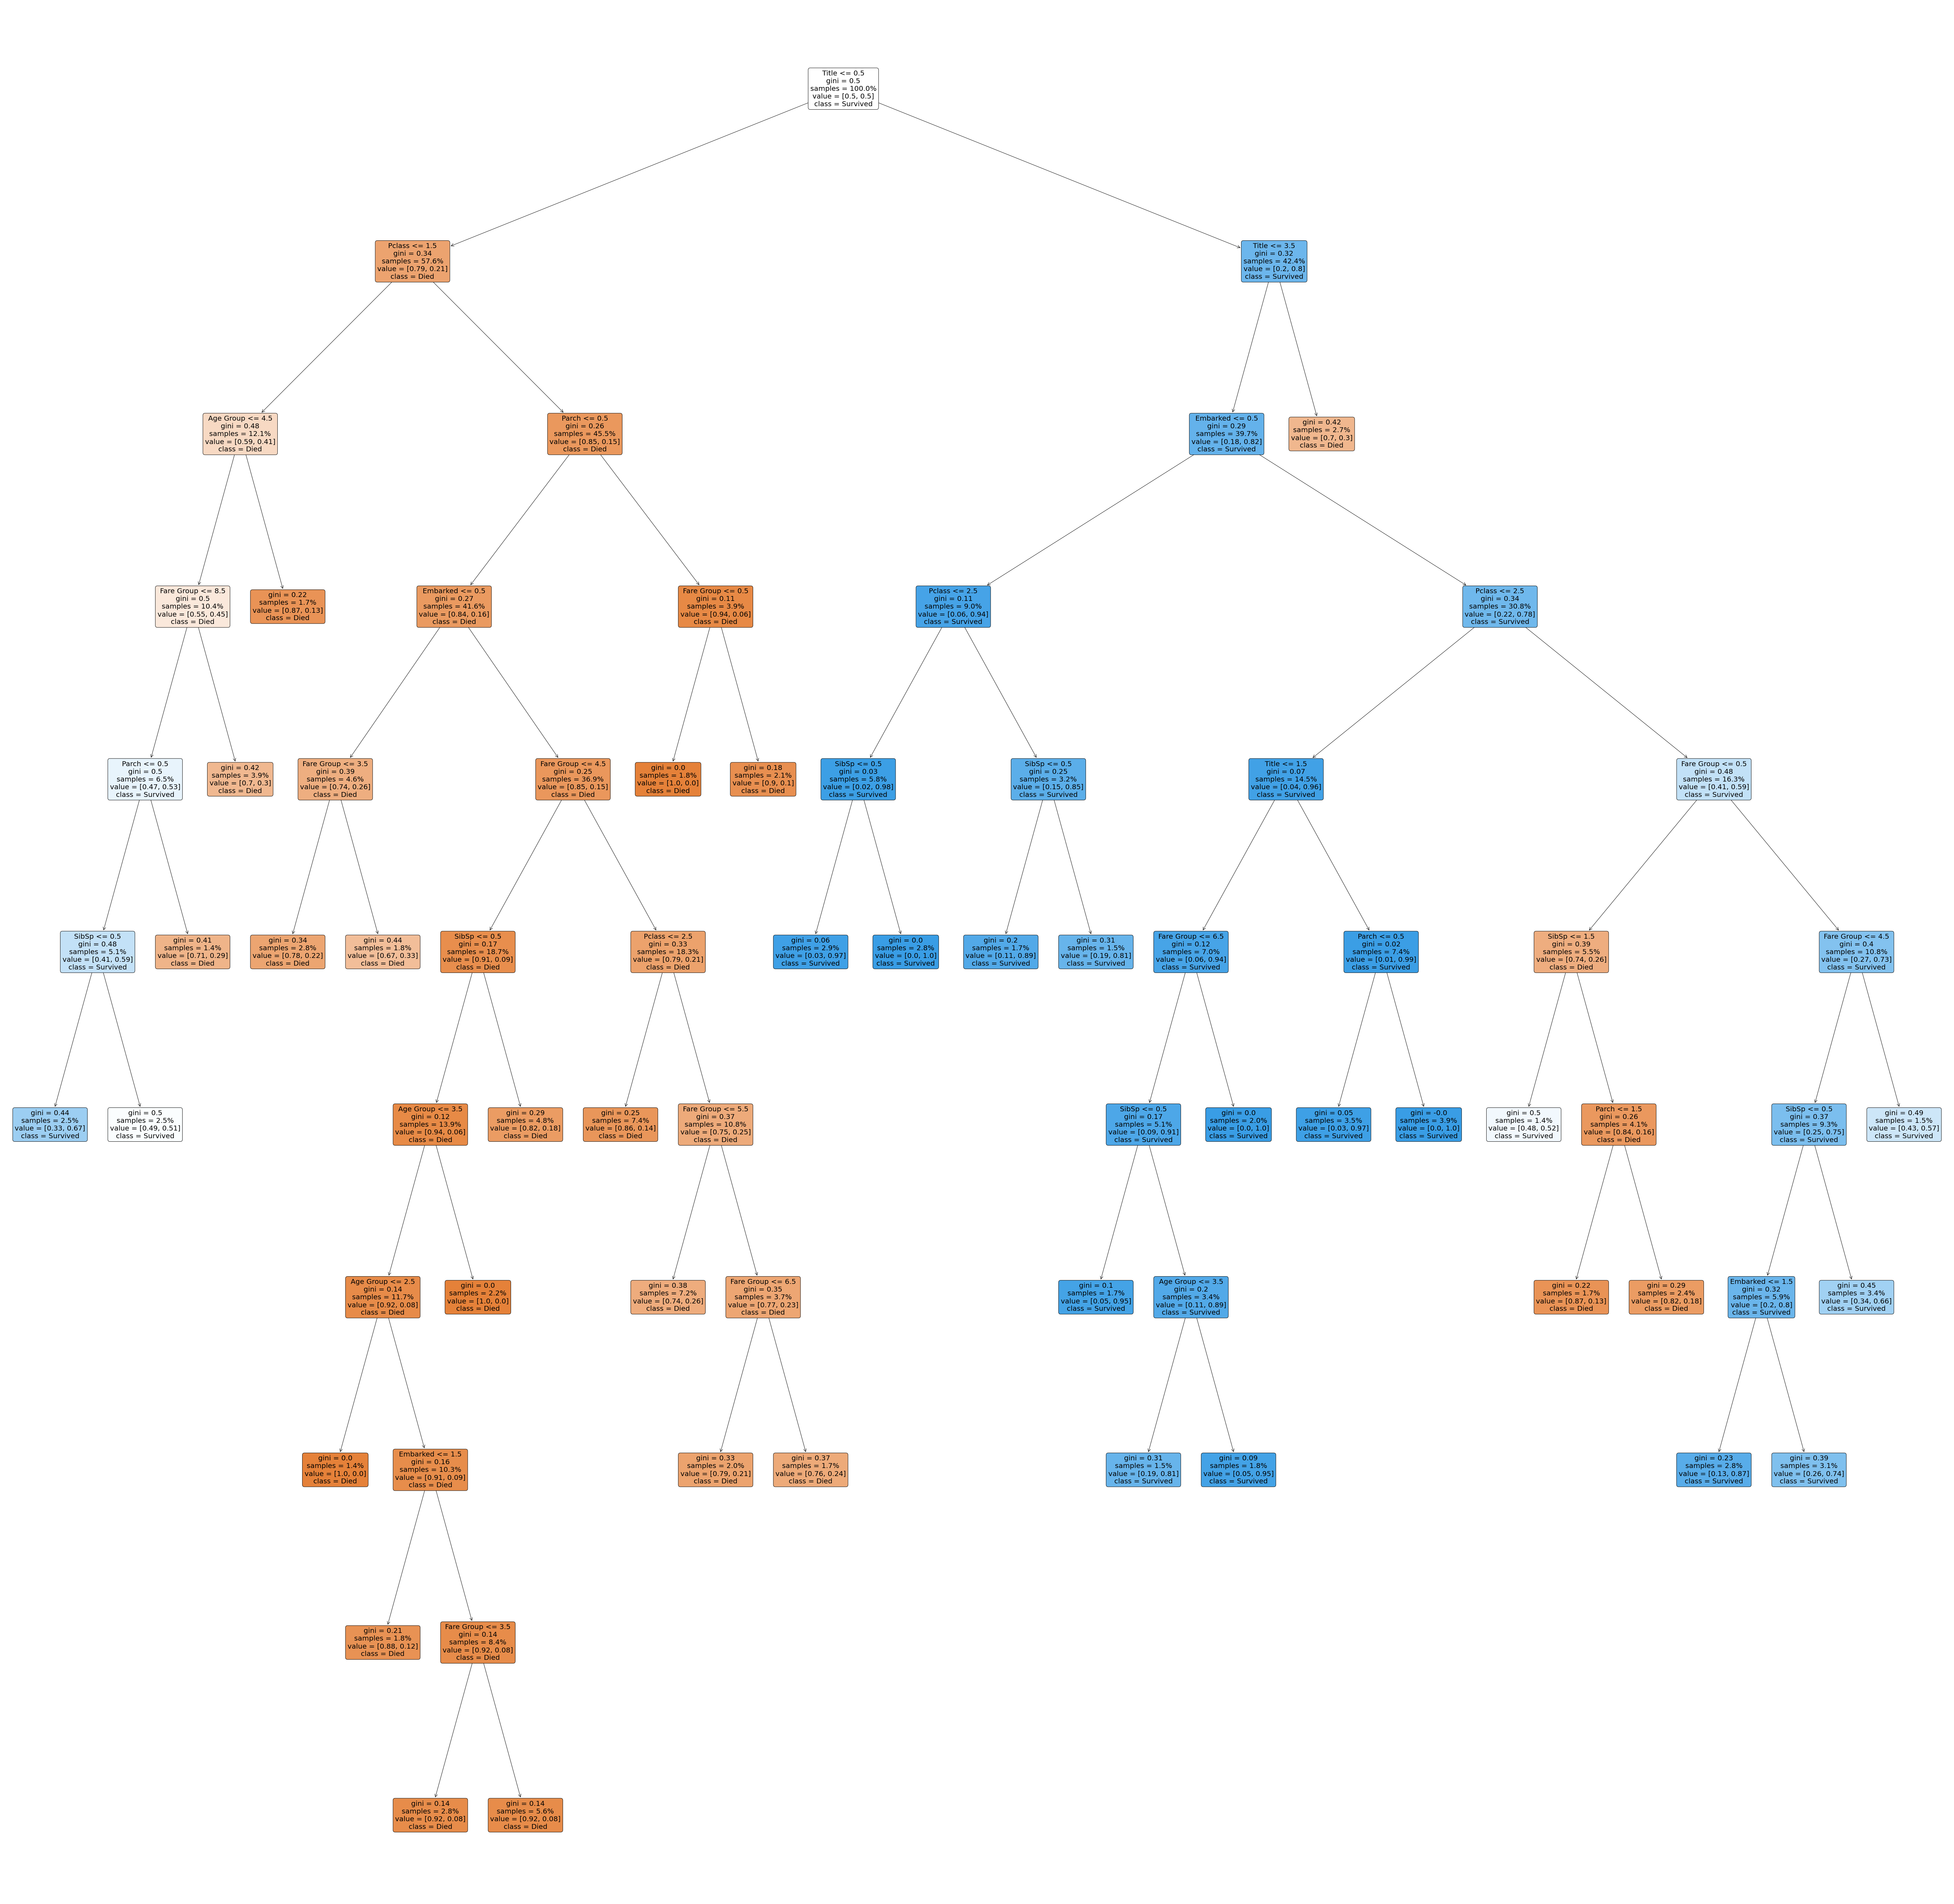

In [ ]:
plt.figure(figsize=(100,100))
tree.plot_tree(
    grid_best,
    feature_names = X_train.columns,
    class_names = ["Died", "Survived"],
    filled = True,
    proportion = True,
    rounded = True,
    precision = 2,
    fontsize=20
)

**Feature Importances**

In [ ]:
feature_importances = pd.DataFrame(
                            grid_best.feature_importances_,
                            index = X.columns,
                            columns=['importance']
                        )
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Title,0.706480
Pclass,0.146029
Fare Group,0.081941
Embarked,0.021797
SibSp,0.020646
Age Group,0.012901
Parch,0.010205
Sex,0.000000


**Comparing the trees**

In [ ]:
pd.DataFrame(
    data = {
                "Accuracy on Training Set" : [train_accuracy_cart, 
                                              train_accuracy_id3, 
                                              train_accuracy_grid_best],
                "Accuracy on Testing Set" : [test_accuracy_cart, 
                                              test_accuracy_id3, 
                                              test_accuracy_grid_best],
            },
    index = ["CART", "ID3", "Grid Search"]
)

,Accuracy on Training Set,Accuracy on Testing Set
CART,0.912921,0.748603
ID3,0.912921,0.737430
Grid Search,0.838483,0.770950


CART obtained with Grid Search is the best tree in this case, as the other trees seems to have the problem of overfitting.

**Prediction**

In [ ]:
surv_pred = grid_best.predict(df2)

survival_predict = pd.DataFrame(
                        data = {
                            "index" : range(0, len(surv_pred), 1),
                            "survival_predict" : surv_pred
                        }
                    )

df_predict = df_predict.reset_index()

final_pred_df = df_predict.merge(survival_predict, on = "index", indicator = False)

In [ ]:
final_pred_df.drop(["index"], axis = 1)

,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,survival_predict
0,892,Mr,James,Kelly,3,male,34.500000,0,0,330911,7.8292,Q,0
1,893,Mrs,James (Ellen Needs),Wilkes,3,female,47.000000,1,0,363272,7.0000,S,1
2,894,Mr,Thomas Francis,Myles,2,male,62.000000,0,0,240276,9.6875,Q,0
3,895,Mr,Albert,Wirz,3,male,27.000000,0,0,315154,8.6625,S,0
4,896,Mrs,Alexander (Helga E Lindqvist),Hirvonen,3,female,22.000000,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,Mr,Woolf,Spector,3,male,30.250000,0,0,A.5. 3236,8.0500,S,0
414,1306,Dona,Fermina,Oliva y Ocana,1,female,39.000000,0,0,PC 17758,108.9000,C,0
415,1307,Mr,Simon Sivertsen,Saether,3,male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,Mr,Frederick,Ware,3,male,30.250000,0,0,359309,8.0500,S,0
